#### Importing dependencies and configuring file paths

In [2]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm, trange
import os

In [3]:
train_data = pd.read_csv('dataset/train.csv')
test_data = pd.read_csv('dataset/test.csv')
city_details = pd.read_csv('dataset/city_details.csv')
covid_data = pd.read_csv('dataset/US_COVID_data_state_level.csv')
whmap = pd.read_csv('dataset/warehouse_mapping.csv')

In [3]:
whmap

,wh_id,warehouse_name
0,1,WAREHOUSE 1 SEATTLE
1,10,WAREHOUSE 10 ANCHORAGE
2,1000,WAREHOUSE 1000 COLUMBIA
3,1001,WAREHOUSE 1001 TUSTIN
4,122,WAREHOUSE 122 TUSTIN RANCH
...,...,...
554,943,WAREHOUSE 943 WESTMINSTER BUS CTR
555,947,WAREHOUSE 947 ONTARIO BUS CTR
556,95,WAREHOUSE 95 TACOMA
557,96,WAREHOUSE 96 BOZEMAN


In [4]:
wh_ids = np.array(train_data["wh_id"].unique(), 'int64')

In [5]:
wh_ids2 = whmap['wh_id'].unique()

In [26]:
np.where(wh_ids!=wh_ids2)

C:\Users\hp\AppData\Local\Temp\ipykernel_18192\1627166335.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  np.where(wh_ids!=wh_ids2)


(array([0], dtype=int64),)

In [11]:
SAVE_PATH = os.path.join('dataset', 'wh_wise_data')
os.makedirs(SAVE_PATH)

In [12]:
TRAIN_PATH = os.path.join(SAVE_PATH, 'train')
TEST_PATH = os.path.join(SAVE_PATH, 'test')

In [13]:
os.makedirs(TRAIN_PATH)
os.makedirs(TEST_PATH)

In [18]:
for id in tqdm(wh_ids):
    wh_data = train_data.loc[train_data['wh_id']==id]
    wh_data.to_csv(TRAIN_PATH+f'\\train_wh_{id}.csv')

  0%|          | 0/560 [00:00<?, ?it/s]

In [23]:
for id in tqdm(wh_ids):
    wh_data = test_data.loc[test_data['wh_id']==id]
    wh_data.to_csv(TEST_PATH+f'\\test_wh_{id}.csv')

  0%|          | 0/560 [00:00<?, ?it/s]

In [32]:
data_r = pd.read_csv('dataset/wh_wise_data/train/train_wh_1004.0.csv')

In [34]:
(data_r)

,Unnamed: 0,date,wh_id,sales
0,4830,02/01/19,1004.0,104
1,4831,03/01/19,1004.0,120
2,4832,04/01/19,1004.0,88
3,4833,05/01/19,1004.0,104
4,4834,06/01/19,1004.0,72
...,...,...,...,...
800,5630,12/03/21,1004.0,207
801,5631,13/03/21,1004.0,3
802,5632,14/03/21,1004.0,162
803,5633,15/03/21,1004.0,157


#### State-Address Mapping

In [4]:
whmap['city'] = whmap['warehouse_name'].map(lambda row: row.split()[2])

In [5]:
whmap_merged = pd.merge(whmap, city_details, on='city', how='left')

In [6]:
whmap_merged

,wh_id,warehouse_name,city,zip_code,state,state_name,country
0,1,WAREHOUSE 1 SEATTLE,SEATTLE,98134,WA,WASHINGTON,US
1,10,WAREHOUSE 10 ANCHORAGE,ANCHORAGE,99515,AK,ALASKA,US
2,1000,WAREHOUSE 1000 COLUMBIA,COLUMBIA,21075,MD,MARYLAND,US
3,1000,WAREHOUSE 1000 COLUMBIA,COLUMBIA,29210,SC,SOUTH CAROLINA,US
4,1001,WAREHOUSE 1001 TUSTIN,TUSTIN,92782,CA,CALIFORNIA,US
...,...,...,...,...,...,...,...
1036,943,WAREHOUSE 943 WESTMINSTER BUS CTR,WESTMINSTER,92683,CA,CALIFORNIA,US
1037,947,WAREHOUSE 947 ONTARIO BUS CTR,ONTARIO,91761,CA,CALIFORNIA,US
1038,95,WAREHOUSE 95 TACOMA,TACOMA,98409,WA,WASHINGTON,US
1039,96,WAREHOUSE 96 BOZEMAN,BOZEMAN,59718,MT,MONTANA,US


In [8]:
whmap_merged = whmap_merged.drop('zip_code', axis=1)

KeyError: "['zip_code'] not found in axis"

In [12]:
whmap_merged = whmap_merged.drop_duplicates(subset=['wh_id'])

In [13]:
whmap_merged

,wh_id,warehouse_name,city,state,state_name,country
0,1,WAREHOUSE 1 SEATTLE,SEATTLE,WA,WASHINGTON,US
1,10,WAREHOUSE 10 ANCHORAGE,ANCHORAGE,AK,ALASKA,US
2,1000,WAREHOUSE 1000 COLUMBIA,COLUMBIA,MD,MARYLAND,US
4,1001,WAREHOUSE 1001 TUSTIN,TUSTIN,CA,CALIFORNIA,US
6,122,WAREHOUSE 122 TUSTIN RANCH,TUSTIN,CA,CALIFORNIA,US
...,...,...,...,...,...,...
1035,943,WAREHOUSE 943 WESTMINSTER BUS CTR,WESTMINSTER,CO,COLORADO,US
1037,947,WAREHOUSE 947 ONTARIO BUS CTR,ONTARIO,CA,CALIFORNIA,US
1038,95,WAREHOUSE 95 TACOMA,TACOMA,WA,WASHINGTON,US
1039,96,WAREHOUSE 96 BOZEMAN,BOZEMAN,MT,MONTANA,US


In [36]:
whmap_merged.to_csv('dataset/warehouse_state_mapping.csv')

#### Alternate State-Address Mapping 

In [24]:
from geopy.geocoders import Nominatim

In [25]:
geolocator = Nominatim(user_agent="geoapi")

In [60]:
add1 = "1040 ST CHARLES"
geolocator.geocode(add1, limit=5)

Location(1040, Hidden Valley Drive, Wentzville, Saint Charles County, Missouri, 63385, United States, (38.8287698, -90.8442557, 0.0))

#### Models Overview

##### Prophet

In [6]:
from prophet import Prophet

In [7]:
data_df = pd.read_csv('dataset/merged_data_train.csv')

In [43]:
prophet = Prophet(changepoint_range=1,changepoint_prior_scale=0.5)

In [9]:
prophet.add_regressor('tot_cases')

In [10]:
wh1_data = data_df.loc[data_df['wh_id']==1.0]

In [11]:
wh1_data = wh1_data.drop('Unnamed: 0', axis=1)

In [12]:
wh1_data = wh1_data.drop('wh_id', axis=1)

In [13]:
wh1_data

,date,sales,tot_cases
0,02/01/19,44,0.0
1,03/01/19,48,0.0
2,04/01/19,36,0.0
3,05/01/19,40,0.0
4,06/01/19,80,0.0
...,...,...,...
800,12/03/21,57,348516.0
801,13/03/21,60,349425.0
802,14/03/21,66,350061.0
803,15/03/21,63,350506.0


In [14]:
wh1_data['date'] = pd.to_datetime(wh1_data['date'], dayfirst=True)

In [15]:
wh1_data = wh1_data.rename(columns={'sales':'y', 'date':'ds'}, )

In [16]:
wh1_data

,ds,y,tot_cases
0,2019-01-02,44,0.0
1,2019-01-03,48,0.0
2,2019-01-04,36,0.0
3,2019-01-05,40,0.0
4,2019-01-06,80,0.0
...,...,...,...
800,2021-03-12,57,348516.0
801,2021-03-13,60,349425.0
802,2021-03-14,66,350061.0
803,2021-03-15,63,350506.0


In [86]:
prophet.fit(wh1_data)

d:\anaconda3\envs\tensorflow\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [87]:
future = wh1_data.iloc[:-25, [0, 2]]
forecast = prophet.predict(future)

d:\anaconda3\envs\tensorflow\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
d:\anaconda3\envs\tensorflow\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [88]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2019-01-02,87.915412,-135.567817,290.245486
1,2019-01-03,73.568209,-114.077175,278.394372
2,2019-01-04,80.284125,-143.696667,292.468550
3,2019-01-05,88.521871,-112.033961,310.658122
4,2019-01-06,59.121555,-155.341690,276.433253


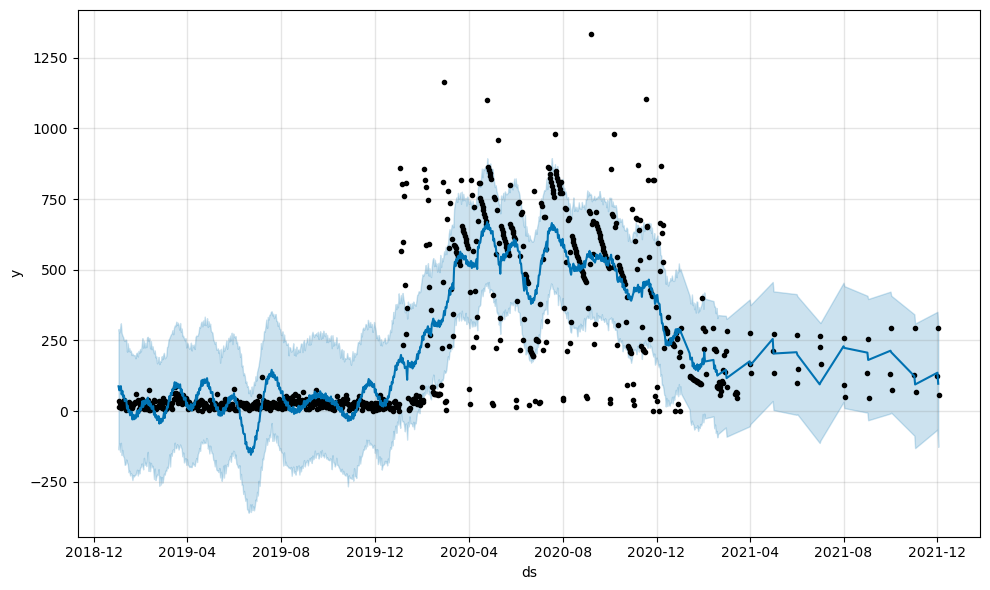

In [89]:
# plot
fig = prophet.plot(forecast)

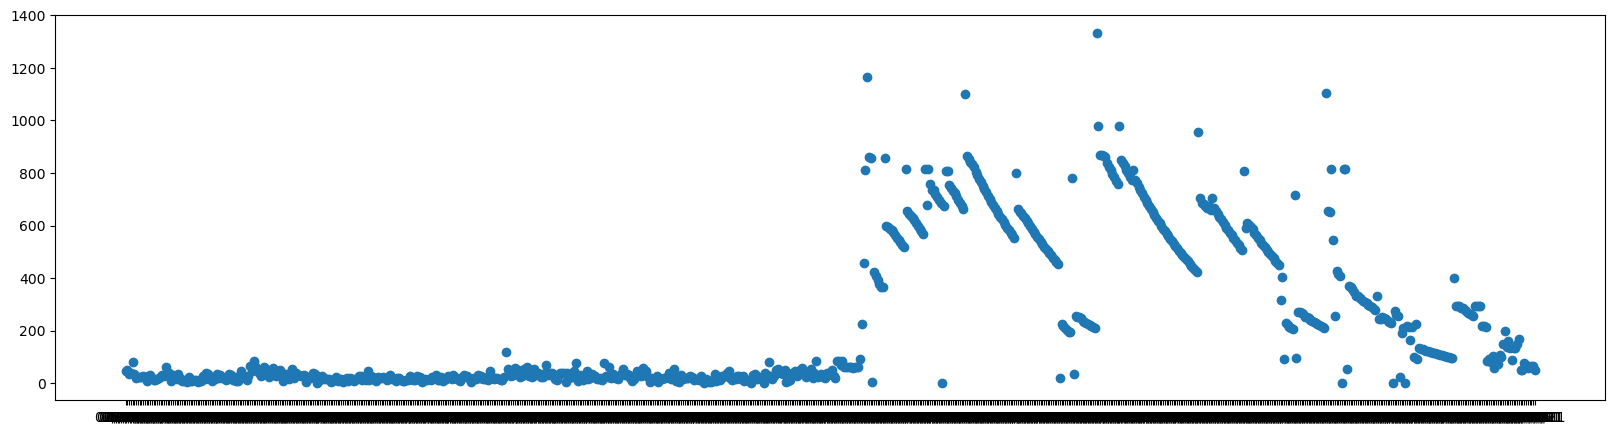

In [11]:
plt.figure(figsize=(20, 5))
# wh1_data.plot(x='ds', y='y', figsize=(10,6))
plt.plot(wh1_data['ds'], wh1_data['y'], 'o')

##### Smoothening signal with fft

In [17]:
from numpy.fft import *

In [35]:
def filter_signal(signal, threshold=3e3):
    fourier = rfft(signal)
    frequencies = rfftfreq(signal.size, d=20e-3/(signal.size))
    fourier[frequencies > threshold] = 0
    return irfft(fourier)

In [36]:
x = filter_signal(wh1_data['y'])

In [37]:
wh1_data['y']

0      44
1      48
2      36
3      40
4      80
       ..
800    57
801    60
802    66
803    63
804    48
Name: y, Length: 805, dtype: int64

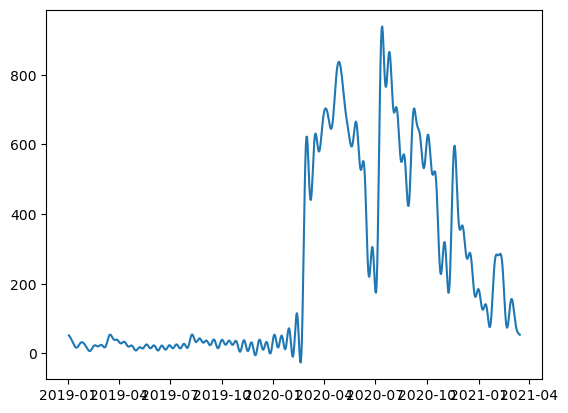

In [38]:
plt.figure()
plt.plot(wh1_data['ds'][:-1], x)

In [18]:
len(wh1_data)

805

In [39]:
wh1_data_fft = wh1_data[['ds', 'y']]

In [40]:
wh1_data_fft = wh1_data_fft[:-1]

In [41]:
wh1_data_fft['y'] = x

In [44]:
prophet.fit(wh1_data_fft)

01:43:38 - cmdstanpy - INFO - Chain [1] start processing
01:43:40 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
future = wh1_data_fft.iloc[:-25]
forecast = prophet.predict(future)

In [81]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2019-01-02,74.251474,-99.789940,236.008801
1,2019-01-03,71.379276,-97.698171,242.736650
2,2019-01-04,75.758441,-90.226725,248.759427
3,2019-01-05,65.497963,-119.779985,227.896131
4,2019-01-06,63.967499,-110.882661,229.311520


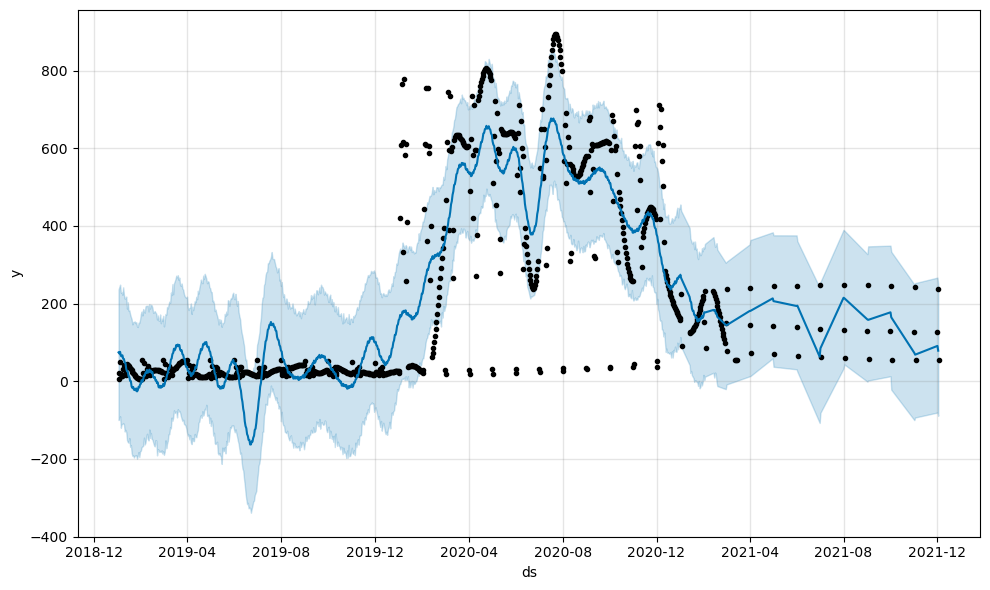

In [82]:
# plot
fig = prophet.plot(forecast)

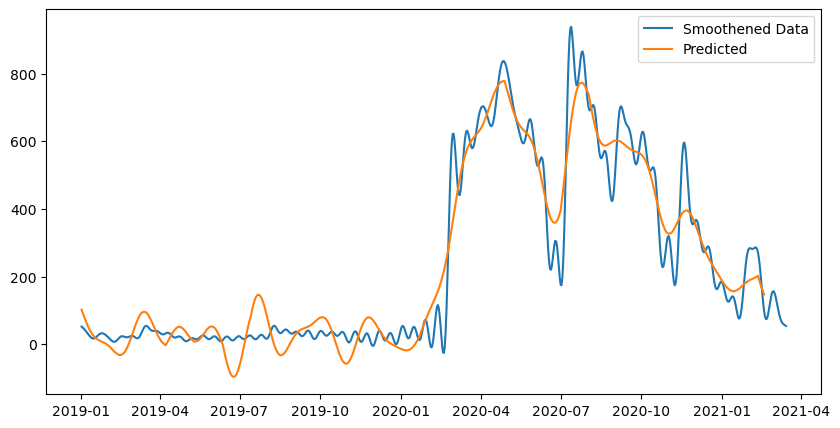

In [51]:
plt.figure(figsize=(10, 5))
plt.plot(wh1_data_fft['ds'], wh1_data_fft['y'])
plt.plot(wh1_data_fft['ds'][:-25], forecast['yhat'])
plt.legend(['Smoothened Data', 'Predicted'])